# **BATS+TBATS**

### **Model Discription**

TBATS and BATS are two models that are used for modeling time series with several seasonalities.

TBATS and BATS are acronyms that denote the following features:

BATS
* B - Box-Cocks
* A - ARMA errors
* T - trend
* S - seasonality

TBATS
* T - trigonometric regressors to model multiple-seasonalitie
* B - Box-Cocks
* A - ARMA errors
* T - trend
* S - seasonality

From acronyms, it is clear that TBATS is a generalization of the BATS model which includes trigonometric regressors.

#### **Equations of the TBATS**

$
\begin{split}
&\begin{split}
\text{Model Part}&\\
y_t^{(\lambda)} &= l_{t-1} + \phi b_{t-1} + \sum_{i=1}^{T}s_{t-m}^{(i)} + d \\ 
l_t &= l_{t-1} + \phi b_{t-1} + \alpha d_t \\ 
b_t &= \phi b_{t-1} + \beta d_t \\
d_t &= \sum_{i=1}^{p}\varphi d_{t-i} + \sum_{i=1}^{q}\theta_ie_{t-i}+e_t \\
\end{split}
\quad \quad \quad \quad \quad \quad \quad \quad
\begin{split}
\text{Where}&\\
y_t^{(\lambda)}&\text{ - time series at moment t (Box-Cox)} \\ 
s_t^{(i)} &\text{ - } i^{th} \text{seasonal component} \\
l_t&\text{ - local level} \\
b_t&\text{ - trend with damping} \\
d_t&\text{ - ARMA(p,q) process for residuals} \\ 
e_t&\text{ - Gaussian white noise}
\end{split} \\
&
\begin{split}
\text{Seasonal Part}&\\
s_t^{(i)} &= \sum_{j=1}^{(k_i)}s_{j,t}^{(i)} \\ 
s_{j,t}^{(i)} &= s_{j,t-1}^{(i)}\cos(\omega_i) + s_{j,t-1}^{(i)}\sin(\omega_i)\gamma_1^{(i)}d_t \\
s_{j,t}^{*(i)} &= -s_{j,t-1}^{(i)}\sin(\omega_i)+s_{j,t-1}^{*(i)}\cos(\omega_i)+\gamma_2^{(i)}d_t \\
\omega_i &= 2\pi j/m_i
\end{split}
\quad \quad \quad
\begin{split}
\text{Model } & \text{parameters}\\
T &\text{ - number of seasonalities} \\ 
m_i&\text{ - length of i^{th} seasonal component} \\
k_i&\text{ - amount of harmonics for i^{th} seasonal period} \\
\lambda&\text{ - Box-Cox transformation} \\
\alpha,\beta&\text{ - smoothing}\\
\phi&\text{ - trend damping}\\ 
\varphi_i, \theta_i&\text{ - ARMA(p,q) coefficients}\\
\gamma_1^{(i)}, \gamma_2^{(i)}&\text{ - seasonal smoothing}\\
\end{split}
\end{split}
$

#### **BATS vs TBATS**

The difference is in the way of modeling seasonal effects.

BETS model seasonal effects in a tranditional way:

$s_t^{(i)} = s_{t-m}^{(i)} + \gamma_id_t$

This approach implies that BATS can model only the seasonality effect with integer period.

#### As TBATS is a generalization of BATS we further will consider only the TBATS model.

## Coding Part

In [1]:
!pip install sktime
!pip install TBATS

import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from sktime.utils.plotting import plot_series

plt.style.use('seaborn-white')
plt.rc('font', size=9)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

#### Loading data

In [2]:
y = pd.read_csv("AEP_hourly.csv", index_col=0)['AEP_MW']
y

Datetime
2004-12-31 01:00:00    13478.0
2004-12-31 02:00:00    12865.0
2004-12-31 03:00:00    12577.0
2004-12-31 04:00:00    12517.0
2004-12-31 05:00:00    12670.0
                        ...   
2018-01-01 20:00:00    21089.0
2018-01-01 21:00:00    20999.0
2018-01-01 22:00:00    20820.0
2018-01-01 23:00:00    20415.0
2018-01-02 00:00:00    19993.0
Name: AEP_MW, Length: 121273, dtype: float64

As we can see this dataset is huge. Every row represents one hour. For sake of convenience, we will only use 1000 last observations. It will be enough for a descriptive tutorial. Also, to fit a model using the sktime library, it is required indexes to be time-periodic. This can be achieved using the `PeriodicIndex()` function from Pandas.

In [3]:
y.index = pd.PeriodIndex(y.index, freq='H')
y.sort_index(inplace=True)
y = y[-1000:]
y

Datetime
2018-06-22 09:00    14978.0
2018-06-22 10:00    15557.0
2018-06-22 11:00    16087.0
2018-06-22 12:00    16544.0
2018-06-22 13:00    17081.0
                     ...   
2018-08-02 20:00    17673.0
2018-08-02 21:00    17303.0
2018-08-02 22:00    17001.0
2018-08-02 23:00    15964.0
2018-08-03 00:00    14809.0
Freq: H, Name: AEP_MW, Length: 1000, dtype: float64

## Investigating the data

First, let's plot the whole time series.

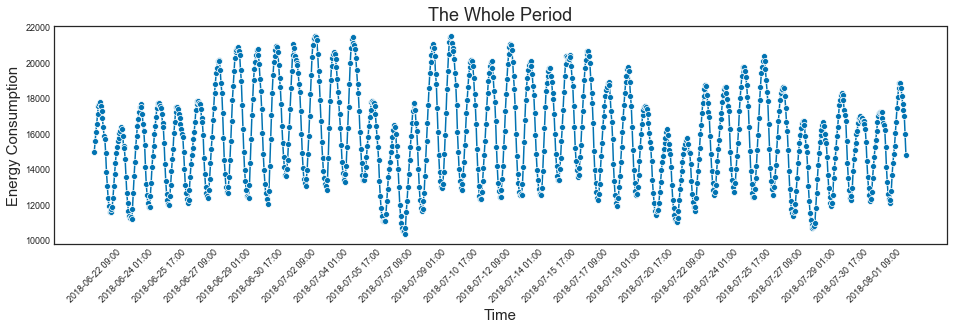

In [11]:
fig, ax = plot_series(y)

plt.title('The Whole Period')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.locator_params(axis='x', nbins=30)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

plt.show()

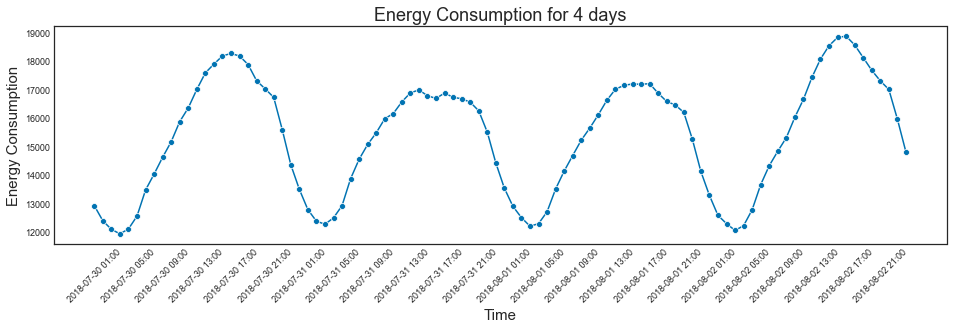

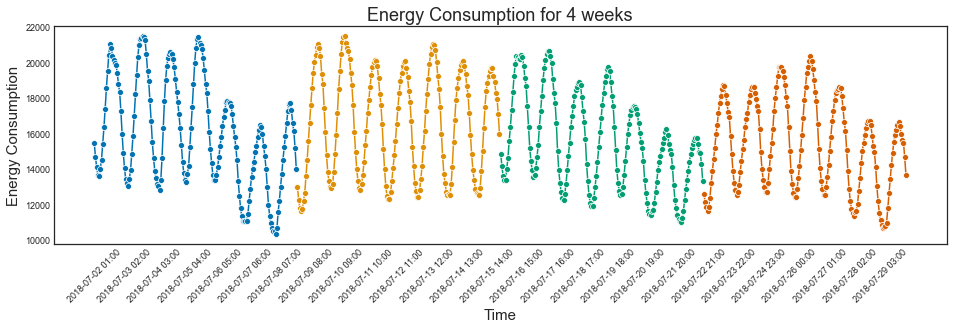

In [12]:
# Days
fig, ax = plot_series(y[-96:])

plt.title('Energy Consumption for 4 days')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')

plt.locator_params(axis='x', nbins=30)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

plt.show()

# Weeks
fig, ax = plot_series(y[-768:-600], y[-600:-432], y[-432:-264], y[-264:-96])

plt.title('Energy Consumption for 4 weeks')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')

plt.locator_params(axis='x', nbins=30)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

plt.show()

From the first plot, we can clearly see that there is daily seasonality. At 5 am energy consumption is minimal during the day. Around 6 pm it is maximal.
Also, from the plots above we can't see any general trend. Timeseries oscillate around some number. Thus, we won't use trend in our TBATS model.

The second plot shows weekly seasonalities.

## Fitting and Predicting

First, we should split data on train and split. We can use a special function from the sktime library.

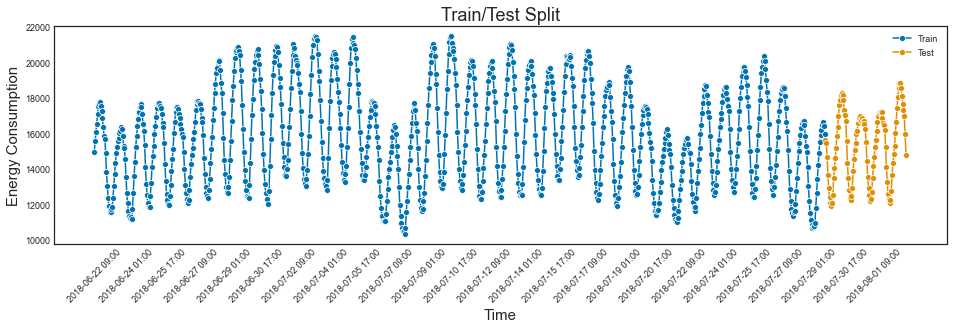

In [13]:
from sktime.forecasting.model_selection import temporal_train_test_split
y_train, y_test = temporal_train_test_split(y, test_size=0.1)

# plot data
fig, ax = plot_series(y_train, y_test, labels=['Train', 'Test'])

plt.title('Train/Test Split')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.locator_params(axis='x', nbins=30)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

plt.show()

#### Fitting TBATS model

To fit TBATS we will use the TBATS module.

`TBATS()` has several parameters that determine the model:

1. `use_box_cox` - If True, applies Box-Cox transformation. By default is None
2. `box_cox_bounds` - Minimal and maximal Box-Cox parameter values. By default is (0, 1)
3. `use_trend` - If True, include trend component. By default is None,
4. `use_damped_trend` - If True, include dumped trend component. By default is None.
5. `sp` - Array if integer or floats which determine seasonalities. By default is none. 
6. `use_arma_errors` - If True, include ARMA component. By default is none.

Let's fit some model to see how it works. We decided not to include trend components as according to graphs we can't see any trend. For sake of simplicity, for the first example, we decided to get rid of ARMA errors as well. However, we decided to use Cox-Box transform and a seasonal period of 24. Seasonal period 24 is equal to one day. We used this period as from the graphs the data seems to have daily periodicity.

In [14]:
from tbats import TBATS, BATS

test_model = TBATS(use_box_cox=True, use_trend=False, use_damped_trend=False, use_arma_errors=False, seasonal_periods=[24])

In [15]:
test_model = TBATS(use_box_cox=True, use_trend=False, use_damped_trend=False, use_arma_errors=False, seasonal_periods=[24])# Fit model
test_model = test_model.fit(y_train)
print(test_model.summary())

Use Box-Cox: True
Use trend: False
Use damped trend: False
Seasonal periods: [24.]
Seasonal harmonics [11]
ARMA errors (p, q): (0, 0)
Box-Cox Lambda 0.000000
Smoothing (Alpha): 1.449829
Seasonal Parameters (Gamma): [-5.02915857e-07  1.44465552e-07]
AR coefficients []
MA coefficients []
Seed vector [ 9.60641586e+00 -9.90028609e-02  2.14639889e-02 -1.73423983e-03
 -1.27738453e-03  2.45397546e-03 -2.08256767e-03  1.76066470e-03
 -3.14371831e-04  1.77601079e-03 -3.04002578e-04  5.73035534e-04
  1.94689406e-01  1.92367179e-02 -2.18590544e-03  3.83102849e-03
 -1.99360293e-03  2.31602284e-03 -1.02070751e-04 -4.40414511e-05
 -5.93875401e-04 -7.37362348e-04 -3.64424003e-04]

AIC 15374.660825


Here are the parameters of the fitted model. We can see that both trend components are None and there is no ARMA component. It used Box-Cox transformation. Also, we can see seasonal parameters used. This summary is enough to write down the formula of our model:


$
\begin{split}
&\text{Model Part}\\
y_t^{(\lambda)} &= l_{t-1} + \sum_{i=1}^{T}s_{t-m}^{(i)}\\ 
l_t &= l_{t-1} \\ 
&\text{Seasonal Part}\\
s_t^{(i)} &= \sum_{j=1}^{(k_i)}s_{j,t}^{(i)} \\ 
s_{j,t}^{(i)} &= s_{j,t-1}^{(i)}\cos(\omega_i) + s_{j,t-1}^{(i)}\sin(\omega_i)\gamma_1^{(i)}d_t \\
s_{j,t}^{*(i)} &= -s_{j,t-1}^{(i)}\sin(\omega_i)+s_{j,t-1}^{*(i)}\cos(\omega_i)+\gamma_2^{(i)}d_t \\
\omega_i &= 2\pi j/m_i
\end{split}
$

###  Доделать формулу

#### Predicting with TBATS

Now let's predict with our model and compare its results to the true values. For `forecast()` you should only specify the number of steps you want to predict.

In [16]:
y_pred = test_model.forecast(len(y_test))
y_pred

array([15455.19996063, 15054.58019021, 14215.0685329 , 13130.35789803,
       12242.96694906, 11573.67413829, 11143.5738919 , 10879.9347517 ,
       10834.85888291, 11086.43740543, 11418.20636626, 12001.36705686,
       12801.96564678, 13562.67429486, 14389.44981233, 15058.44072947,
       15670.37923536, 16147.18613855, 16450.75862526, 16616.80113102,
       16746.45605821, 16716.72701457, 16493.60524485, 16032.24530217,
       15455.19996063, 15054.58019021, 14215.0685329 , 13130.35789803,
       12242.96694906, 11573.67413829, 11143.5738919 , 10879.9347517 ,
       10834.85888291, 11086.43740543, 11418.20636626, 12001.36705686,
       12801.96564678, 13562.67429486, 14389.44981233, 15058.44072947,
       15670.37923536, 16147.18613855, 16450.75862526, 16616.80113102,
       16746.45605821, 16716.72701457, 16493.60524485, 16032.24530217,
       15455.19996063, 15054.58019021, 14215.0685329 , 13130.35789803,
       12242.96694906, 11573.67413829, 11143.5738919 , 10879.9347517 ,
      

In [17]:
y_pred = pd.Series(index = y_test.index, data = y_pred)

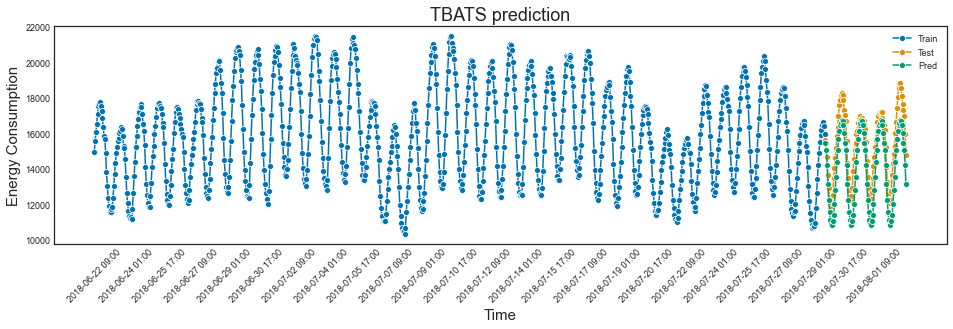

In [21]:
fig, ax = plot_series(y_train, y_test, y_pred, labels=['Train', 'Test', 'Pred'])

plt.title('TBATS prediction')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.locator_params(axis='x', nbins=30)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

plt.show()

We can see that model did pretty well. However, we can see that on some days it slightly underpredict. We can try to search for a better model. TBATS automatically searches for the best possible model. The only thing you have to specify automatically is the seasonal periods.

This time we will let the model find the best set of parameters by itself. We will set seasonal periods equal to 24 again.

## Choosing best model

If you initialize the TBATS model and specify only a seasonal period, it will find the best possible combinations of other parameters by itself. However, it may take a very long time for the model to find the best possible set of parameters. So, if you, for example, completely sure that there is no trend component, you can specify it manually.

Seasonal periods we will take 24 as we have seen that there is daily seasonality. Also, we will specify an additional weekly seasonal period 24*7, because we think that consumption of electricity can depend on the week of the day.

In [22]:
best_model = TBATS(seasonal_periods=[24, 24*7])
best_model = best_model.fit(y_train)
print(best_model.summary())

Use Box-Cox: False
Use trend: False
Use damped trend: False
Seasonal periods: [ 24. 168.]
Seasonal harmonics [11  1]
ARMA errors (p, q): (5, 4)
Smoothing (Alpha): 1.855018
Seasonal Parameters (Gamma): [-3.15441327e-05 -3.03459439e-05 -3.34465902e-05  5.97865705e-05]
AR coefficients [-3.34465902e-05  5.97865705e-05 -6.12892416e-01  7.37117430e-02
  6.55784456e-02]
MA coefficients [-0.20723992  0.6876138   0.20208669  0.24750266]
Seed vector [ 1.53412996e+04 -1.54490766e+03  2.30347052e+02 -6.11638935e+01
 -1.84349142e+01  3.85480865e+01 -3.39287579e+01  2.53996240e+01
 -9.56253100e+00  2.71399921e+01 -6.71668000e+00  1.08409995e+01
  3.04228875e+03  1.63107083e+02 -2.30230865e+01  5.48199565e+01
 -3.76403718e+01  3.87097151e+01 -7.07936819e+00 -1.88810235e-01
 -9.26135510e+00 -9.08926762e+00 -4.59465373e+00 -1.05965874e+02
 -8.21607550e+02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]

A

As we can see that the model decided not to use Box-Cox transform, trend, and dumped trend components. For daily seasonality, it used 11 harmonics and for weekly seasonality, it used 1 harmonic, It also used ARMA components to model this time series. It used ARMA(5, 4) with the coefficients listed above.

In [23]:
y_pred_best = best_model.forecast(len(y_test))
y_pred_best = pd.Series(index = y_test.index, data = y_pred_best)

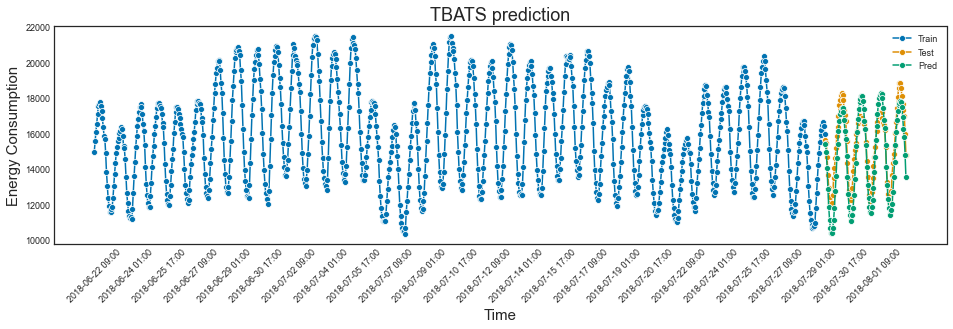

In [24]:
fig, ax = plot_series(y_train, y_test, y_pred_best, labels=['Train', 'Test', 'Pred'])

plt.title('TBATS prediction')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.locator_params(axis='x', nbins=30)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

plt.show()

Looking at predictions, we can see that they are very accurate. We can see that the AIC score is lower with this model. This means that this model fits the data better.

#### Distinctive feature of the TBATS model is that the seasonal period can be non-integer.

For example, let's use a seasonal period of 24.5 just to show that it will work. We don't think that it is useful for this dataset.

In [25]:
aa = TBATS(seasonal_periods=[24.5])
aa = aa.fit(y_train)
print(aa.summary())

Use Box-Cox: False
Use trend: False
Use damped trend: False
Seasonal periods: []
Seasonal harmonics []
ARMA errors (p, q): (3, 4)
Smoothing (Alpha): 1.130453
Seasonal Parameters (Gamma): []
AR coefficients [ 0.40971159  0.92872371 -0.48098787]
MA coefficients [ 0.65821059 -0.38033947 -0.4600534  -0.41759665]
Seed vector [15703.04803559     0.             0.             0.
     0.             0.             0.             0.        ]

AIC 16231.055915


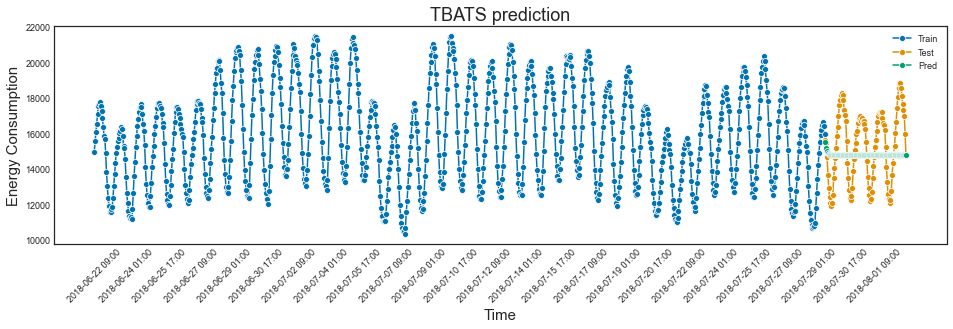

In [26]:
a = aa.forecast(len(y_test))
a = pd.Series(index = y_test.index, data = a)
fig, ax = plot_series(y_train, y_test, a, labels=['Train', 'Test', 'Pred'])

plt.title('TBATS prediction')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.locator_params(axis='x', nbins=30)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

plt.show()

As we can see it didn't return an error but predictions are bad.

## Comparing models with sliding window

/Users/tanyachabrova/opt/anaconda3/envs/sktime/lib/python3.7/site-packages/statsmodels/tsa/exponential_smoothing/ets.py:1135: RuntimeWarning: invalid value encountered in log
  logL -= np.sum(np.log(yhat))
/Users/tanyachabrova/opt/anaconda3/envs/sktime/lib/python3.7/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


[(10000.0, 22000.0)]

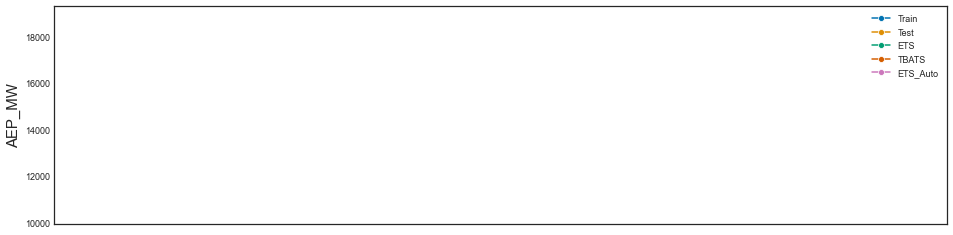

In [27]:
from sktime.forecasting.ets import AutoETS
from sktime.forecasting.base import ForecastingHorizon 

# TBATS vs ETS model without sliding window
horizon = ForecastingHorizon(y_test.index, is_relative=False)

ets_model = AutoETS(error='add', trend='add', seasonal='add', sp=24)
ets_model.fit(y_train)
y_pred_ets = ets_model.predict(horizon)

ets_auto_model = AutoETS(auto=True, sp=24)
ets_auto_model.fit(y_train)
y_pred_auto = ets_auto_model.predict(horizon)

fig,ax = plot_series(y_train[-50:], y_test, y_pred, y_pred_best, y_pred_auto, labels=['Train', 'Test', 'ETS', 'TBATS', 'ETS_Auto'])
ax.set(xlim=(10000, 22000))

## Sliding window

We will use 4 weeks for training and test on the next 5 days.

We compare the AIC information criterion for the prediction of each model. The one with the lowest AIC is the best.

In [28]:
# sliding window
from sklearn.metrics import mean_squared_error as mse

n_ob = len(y)
wind = 24 * 34
train_wind = 24*28
test_wind = 24*5

ar = []
for start in range(n_ob - wind):
    train_set = y[start:start+train_wind]
    test_set = y[start+train_wind:start+wind]

    horizon = ForecastingHorizon(test_set.index, is_relative=False)

    ets_model.fit(train_set)
    ets_auto_model.fit(train_set)
    best_model.fit(train_set)

    y_pred_ets = ets_model.predict(horizon)
    y_pred_auto = ets_auto_model.predict(horizon)
    tbats_pred = pd.Series(index = test_set.index, data = best_model.forecast(len(test_set)))

    # take arima and compare 
    break

/Users/tanyachabrova/opt/anaconda3/envs/sktime/lib/python3.7/site-packages/statsmodels/tsa/exponential_smoothing/ets.py:1135: RuntimeWarning: invalid value encountered in log
  logL -= np.sum(np.log(yhat))
/Users/tanyachabrova/opt/anaconda3/envs/sktime/lib/python3.7/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
